In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
sns.set_style('whitegrid')

plt.rc('figure', autolayout=True)
plt.rc('axes', labelweight='bold', labelsize='large',
       titleweight='bold', titlesize=18, titlepad=10)
plt.rc('animation', html='html5')

import warnings
warnings.filterwarnings('ignore')

In [3]:
train_data = pd.read_csv("Z:\\Sasindu\\Data set\\Rain\\train.csv")
test_data = pd.read_csv("Z:\\Sasindu\\Data set\\Rain\\test.csv")

In [4]:
train_df = pd.DataFrame(train_data)
test_df = pd.DataFrame(test_data)

In [5]:
train_df.head()

,id,day,pressure,maxtemp,temparature,mintemp,dewpoint,humidity,cloud,sunshine,winddirection,windspeed,rainfall
0,0,1,1017.4,21.2,20.6,19.9,19.4,87.0,88.0,1.1,60.0,17.2,1
1,1,2,1019.5,16.2,16.9,15.8,15.4,95.0,91.0,0.0,50.0,21.9,1
2,2,3,1024.1,19.4,16.1,14.6,9.3,75.0,47.0,8.3,70.0,18.1,1
3,3,4,1013.4,18.1,17.8,16.9,16.8,95.0,95.0,0.0,60.0,35.6,1
4,4,5,1021.8,21.3,18.4,15.2,9.6,52.0,45.0,3.6,40.0,24.8,0


In [6]:
test_df.head()

,id,day,pressure,maxtemp,temparature,mintemp,dewpoint,humidity,cloud,sunshine,winddirection,windspeed
0,2190,1,1019.5,17.5,15.8,12.7,14.9,96.0,99.0,0.0,50.0,24.3
1,2191,2,1016.5,17.5,16.5,15.8,15.1,97.0,99.0,0.0,50.0,35.3
2,2192,3,1023.9,11.2,10.4,9.4,8.9,86.0,96.0,0.0,40.0,16.9
3,2193,4,1022.9,20.6,17.3,15.2,9.5,75.0,45.0,7.1,20.0,50.6
4,2194,5,1022.2,16.1,13.8,6.4,4.3,68.0,49.0,9.2,20.0,19.4


In [7]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2190 entries, 0 to 2189
Data columns (total 13 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id             2190 non-null   int64  
 1   day            2190 non-null   int64  
 2   pressure       2190 non-null   float64
 3   maxtemp        2190 non-null   float64
 4   temparature    2190 non-null   float64
 5   mintemp        2190 non-null   float64
 6   dewpoint       2190 non-null   float64
 7   humidity       2190 non-null   float64
 8   cloud          2190 non-null   float64
 9   sunshine       2190 non-null   float64
 10  winddirection  2190 non-null   float64
 11  windspeed      2190 non-null   float64
 12  rainfall       2190 non-null   int64  
dtypes: float64(10), int64(3)
memory usage: 222.5 KB


In [8]:
test_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 12 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id             730 non-null    int64  
 1   day            730 non-null    int64  
 2   pressure       730 non-null    float64
 3   maxtemp        730 non-null    float64
 4   temparature    730 non-null    float64
 5   mintemp        730 non-null    float64
 6   dewpoint       730 non-null    float64
 7   humidity       730 non-null    float64
 8   cloud          730 non-null    float64
 9   sunshine       730 non-null    float64
 10  winddirection  729 non-null    float64
 11  windspeed      730 non-null    float64
dtypes: float64(10), int64(2)
memory usage: 68.6 KB


In [9]:
train_df.isnull().sum()

id               0
day              0
pressure         0
maxtemp          0
temparature      0
mintemp          0
dewpoint         0
humidity         0
cloud            0
sunshine         0
winddirection    0
windspeed        0
rainfall         0
dtype: int64

In [10]:
test_df.isnull().sum()

id               0
day              0
pressure         0
maxtemp          0
temparature      0
mintemp          0
dewpoint         0
humidity         0
cloud            0
sunshine         0
winddirection    1
windspeed        0
dtype: int64

In [11]:
train_df.describe()

,id,day,pressure,maxtemp,temparature,mintemp,dewpoint,humidity,cloud,sunshine,winddirection,windspeed,rainfall
count,2190.000000,2190.000000,2190.000000,2190.000000,2190.000000,2190.000000,2190.000000,2190.000000,2190.000000,2190.000000,2190.000000,2190.000000,2190.000000
mean,1094.500000,179.948402,1013.602146,26.365799,23.953059,22.170091,20.454566,82.036530,75.721918,3.744429,104.863151,21.804703,0.753425
std,632.342866,105.203592,5.655366,5.654330,5.222410,5.059120,5.288406,7.800654,18.026498,3.626327,80.002416,9.898659,0.431116
min,0.000000,1.000000,999.000000,10.400000,7.400000,4.000000,-0.300000,39.000000,2.000000,0.000000,10.000000,4.400000,0.000000
25%,547.250000,89.000000,1008.600000,21.300000,19.300000,17.700000,16.800000,77.000000,69.000000,0.400000,40.000000,14.125000,1.000000
50%,1094.500000,178.500000,1013.000000,27.800000,25.500000,23.850000,22.150000,82.000000,83.000000,2.400000,70.000000,20.500000,1.000000
75%,1641.750000,270.000000,1017.775000,31.200000,28.400000,26.400000,25.000000,88.000000,88.000000,6.800000,200.000000,27.900000,1.000000
max,2189.000000,365.000000,1034.600000,36.000000,31.500000,29.800000,26.700000,98.000000,100.000000,12.100000,300.000000,59.500000,1.000000


In [12]:
for col in train_df.columns:
    print(col,'---->',train_df[col].nunique())

id ----> 2190
day ----> 365
pressure ----> 236
maxtemp ----> 219
temparature ----> 198
mintemp ----> 199
dewpoint ----> 218
humidity ----> 49
cloud ----> 78
sunshine ----> 120
winddirection ----> 35
windspeed ----> 223
rainfall ----> 2


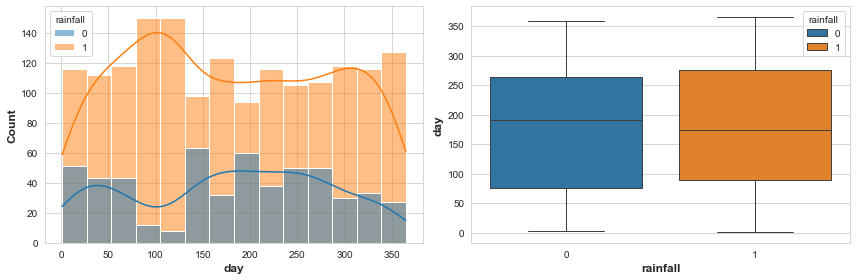

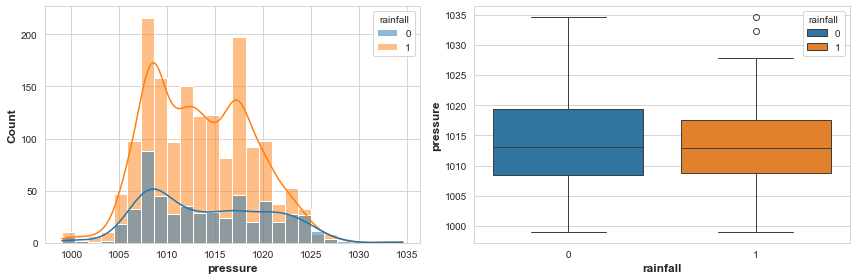

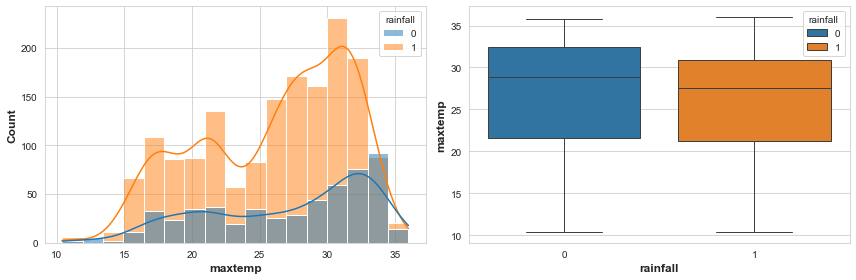

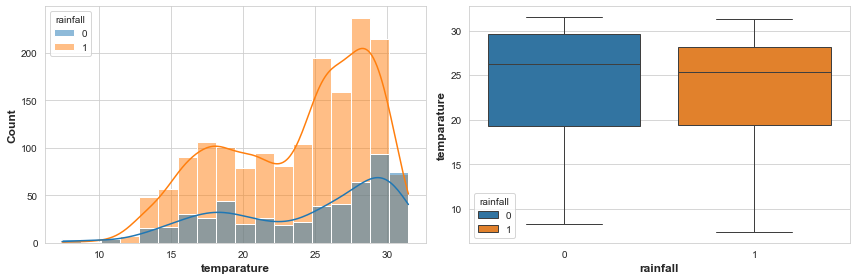

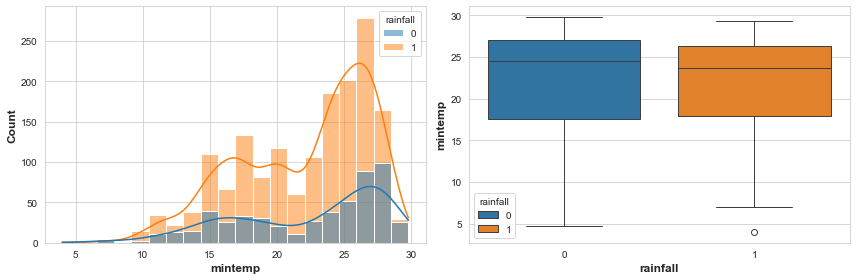

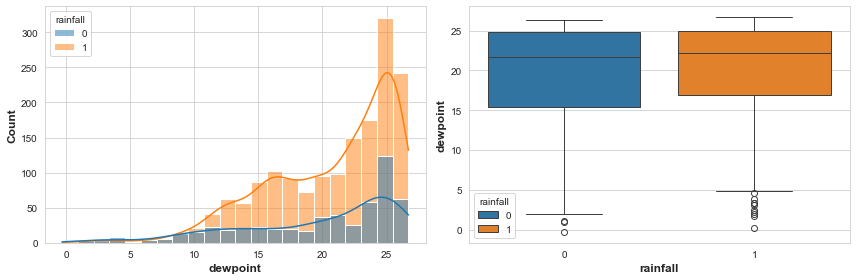

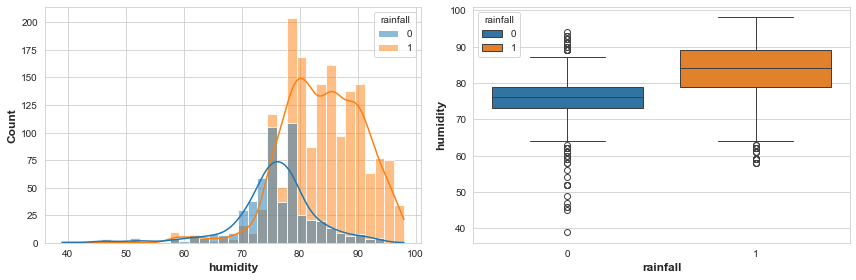

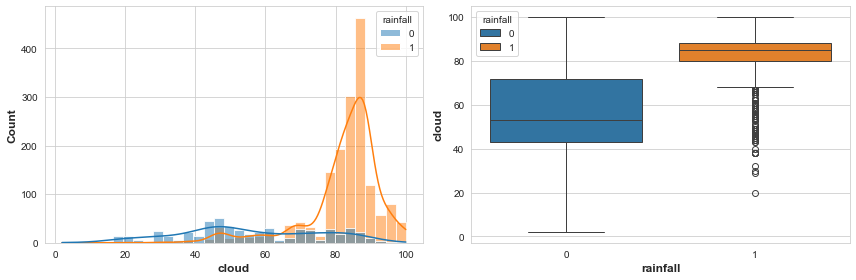

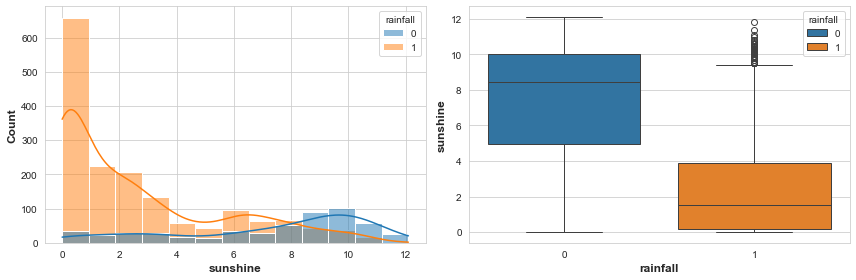

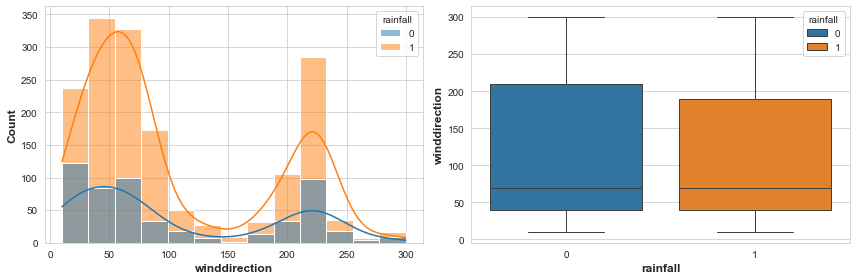

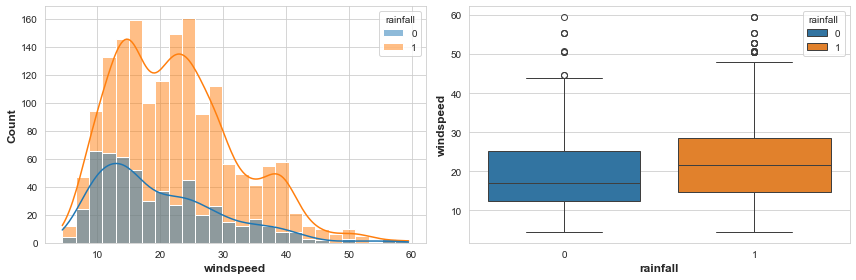

In [13]:
numeric_vals = ['day','pressure','maxtemp','temparature','mintemp',"dewpoint","humidity","cloud","sunshine","winddirection","windspeed"]

for col in numeric_vals:
    plt.figure(figsize=(12, 4))
    plt.subplot(1, 2, 1)
    sns.histplot(data=train_df, x=col, kde=True, hue="rainfall")
    plt.subplot(1, 2, 2)
    sns.boxplot(data=train_df, x="rainfall",y=col, hue="rainfall")
    plt.tight_layout()
    plt.show()

In [14]:
numeric_df = train_df.select_dtypes(include = ['number'])
corr_matrix = numeric_df.corr()

In [15]:
print(corr_matrix['rainfall'].sort_values(ascending = False).to_string())

rainfall         1.000000
cloud            0.641191
humidity         0.454213
windspeed        0.111625
dewpoint         0.081965
id               0.033674
day             -0.000462
winddirection   -0.006939
mintemp         -0.026841
temparature     -0.049660
pressure        -0.049886
maxtemp         -0.079304
sunshine        -0.555287


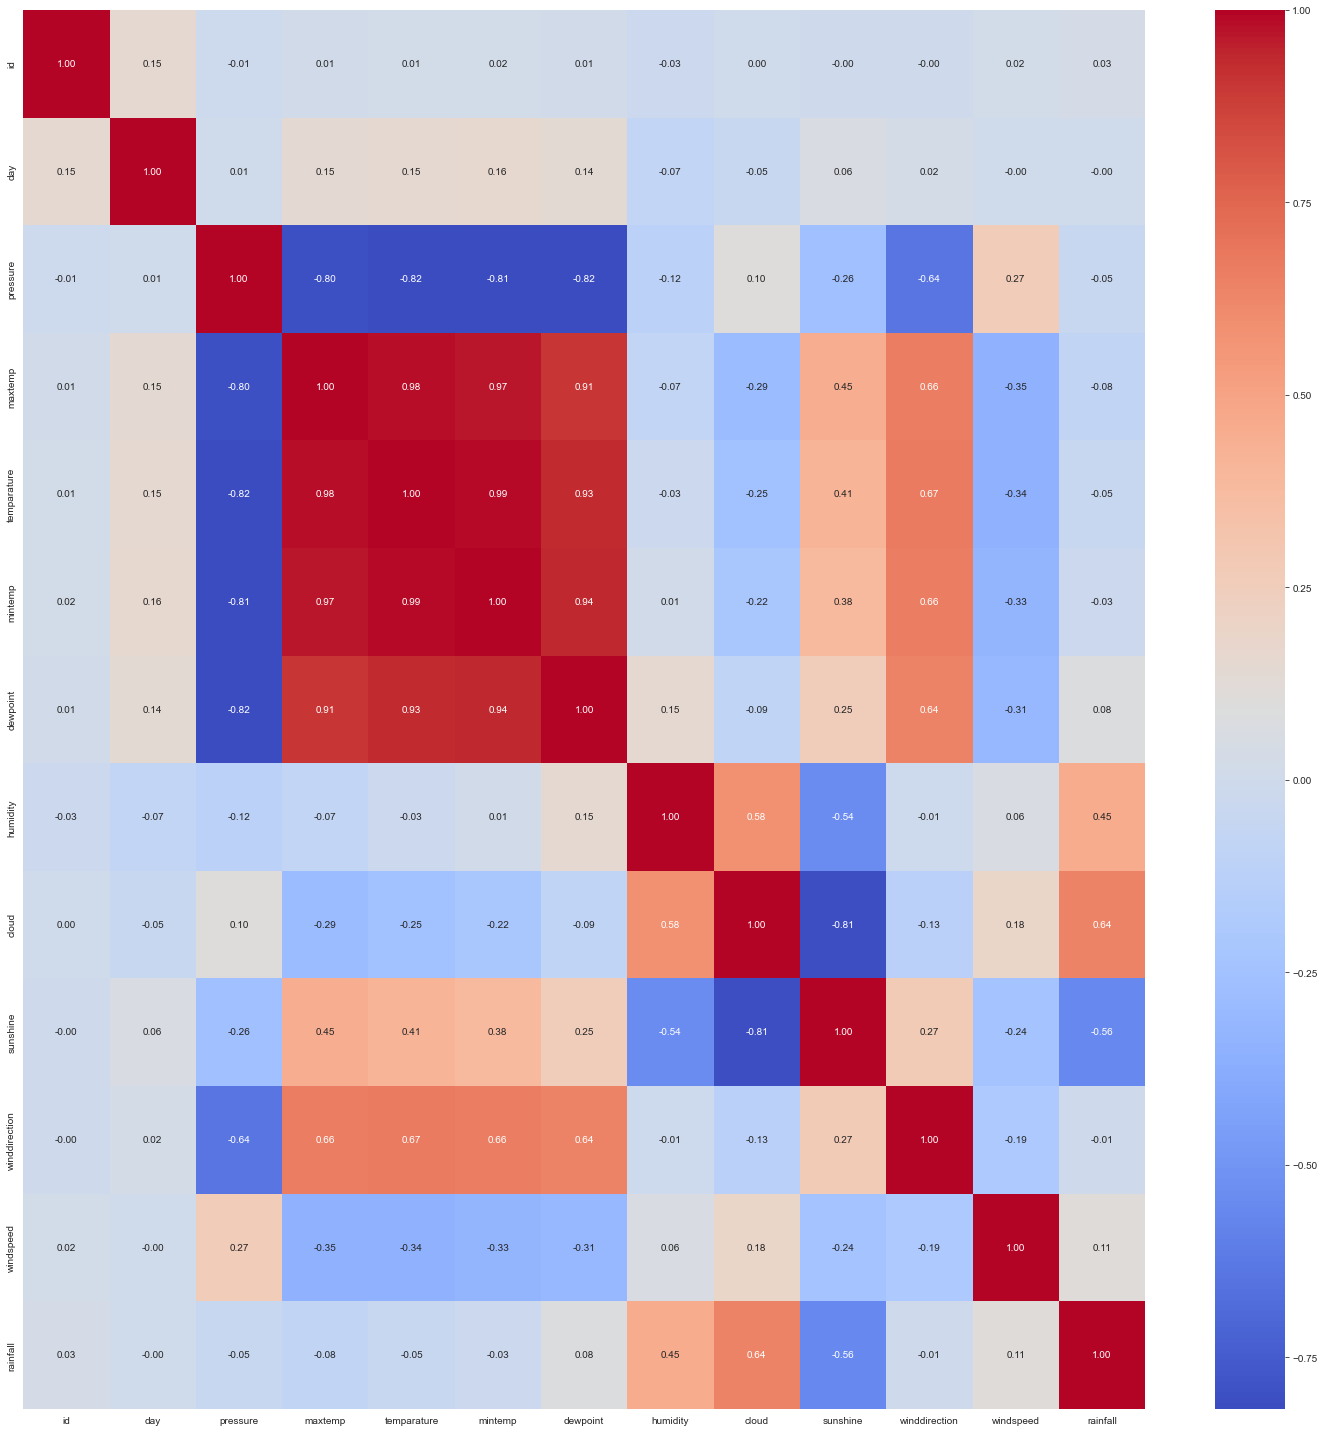

In [16]:
plt.figure(figsize=(20,20))
sns.heatmap(corr_matrix,annot=True,cmap = 'coolwarm', fmt = ".2f")
plt.show()

In [17]:
High_correlate = corr_matrix[corr_matrix >= 0.75]
print(High_correlate[High_correlate<1.0].stack().to_string())

maxtemp      temparature    0.982932
             mintemp        0.965529
             dewpoint       0.906703
temparature  maxtemp        0.982932
             mintemp        0.987150
             dewpoint       0.933617
mintemp      maxtemp        0.965529
             temparature    0.987150
             dewpoint       0.941342
dewpoint     maxtemp        0.906703
             temparature    0.933617
             mintemp        0.941342


In [18]:
High_correlate_inverse = corr_matrix[corr_matrix <= -0.75]
print(High_correlate_inverse[High_correlate_inverse<1.0].stack().to_string())

pressure     maxtemp       -0.800499
             temparature   -0.816531
             mintemp       -0.814453
             dewpoint      -0.817008
maxtemp      pressure      -0.800499
temparature  pressure      -0.816531
mintemp      pressure      -0.814453
dewpoint     pressure      -0.817008
cloud        sunshine      -0.805128
sunshine     cloud         -0.805128


In [19]:
final_train_df = train_df.drop(columns= ['id','maxtemp','mintemp','dewpoint'],axis=1)

In [20]:
x = final_train_df.drop('rainfall',axis = 1)
y = final_train_df["rainfall"]

In [21]:
from sklearn.model_selection import train_test_split

In [22]:
x_train,x_val,y_train,y_val = train_test_split(x,y,test_size = 0.3,random_state = 42)

In [23]:
from sklearn.preprocessing import MinMaxScaler

mm = MinMaxScaler()
x_train_scaled = mm.fit_transform(x_train)
x_val_scaled = mm.transform(x_val)

In [27]:
from sklearn.decomposition import PCA

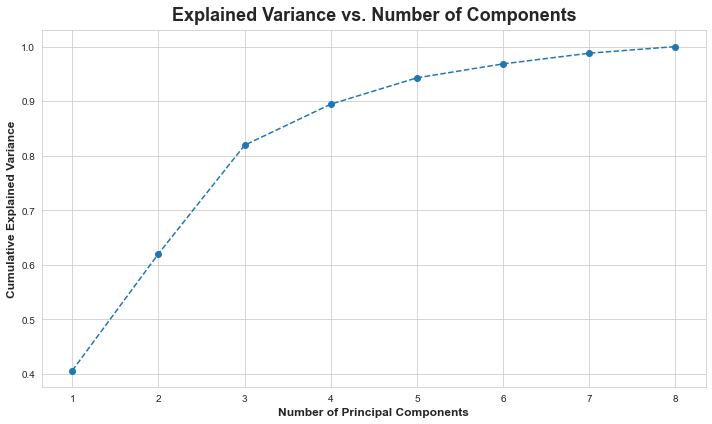

In [28]:
pca = PCA()
pca.fit(x_train_scaled)

explained_variance_ratio = pca.explained_variance_ratio_
cumulative_explained_variance = explained_variance_ratio.cumsum()

plt.figure(figsize=(10, 6))
plt.plot(range(1, len(explained_variance_ratio) + 1), cumulative_explained_variance, marker='o', linestyle='--')
plt.xlabel('Number of Principal Components')
plt.ylabel('Cumulative Explained Variance')
plt.title('Explained Variance vs. Number of Components')
plt.show()

In [32]:
pca = PCA(n_components=7)
x_train_pca = pca.fit_transform(x_train_scaled)
x_test_pca = pca.transform(x_val_scaled)

In [24]:
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

In [25]:
def model_acc(model):
    model.fit(x_train_scaled,y_train)
    y_pred = model.predict(x_val_scaled)
    y_pred_train = model.predict(x_train_scaled)
    train_accuracy = accuracy_score(y_train,y_pred_train)
    test_accuracy = accuracy_score(y_val, y_pred)
    print(str(model)+'-->'+str(train_accuracy))
    print(str(model)+'-->'+str(test_accuracy))
    print("Confusion Matrix:\n", confusion_matrix(y_val,y_pred))
    print("Classification Report:\n", classification_report(y_val, y_pred))

In [26]:
from sklearn.linear_model import LogisticRegression
lr = LogisticRegression()
model_acc(lr)

from sklearn.tree import DecisionTreeClassifier
dt = DecisionTreeClassifier()
model_acc(dt)

from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier()
model_acc(rf)

import xgboost as xgb
xgb = xgb.XGBClassifier(
    objective='binary:logistic',
    eval_metric='logloss',
    use_label_encoder=False,
    random_state=42)
model_acc(xgb)

LogisticRegression()-->0.8669275929549902
LogisticRegression()-->0.863013698630137
Confusion Matrix:
 [[105  62]
 [ 28 462]]
Classification Report:
               precision    recall  f1-score   support

           0       0.79      0.63      0.70       167
           1       0.88      0.94      0.91       490

    accuracy                           0.86       657
   macro avg       0.84      0.79      0.81       657
weighted avg       0.86      0.86      0.86       657

DecisionTreeClassifier()-->1.0
DecisionTreeClassifier()-->0.791476407914764
Confusion Matrix:
 [[ 97  70]
 [ 67 423]]
Classification Report:
               precision    recall  f1-score   support

           0       0.59      0.58      0.59       167
           1       0.86      0.86      0.86       490

    accuracy                           0.79       657
   macro avg       0.72      0.72      0.72       657
weighted avg       0.79      0.79      0.79       657

RandomForestClassifier()-->1.0
RandomForestClassifier()

In [30]:
def model_acc(model):
    model.fit(x_train_pca,y_train)
    y_pred = model.predict(x_test_pca)
    y_pred_train = model.predict(x_train_pca)
    train_accuracy = accuracy_score(y_train,y_pred_train)
    test_accuracy = accuracy_score(y_val, y_pred)
    print(str(model)+'-->'+str(train_accuracy))
    print(str(model)+'-->'+str(test_accuracy))
    print("Confusion Matrix:\n", confusion_matrix(y_val,y_pred))
    print("Classification Report:\n", classification_report(y_val, y_pred))

In [33]:
from sklearn.linear_model import LogisticRegression
lr = LogisticRegression()
model_acc(lr)

from sklearn.tree import DecisionTreeClassifier
dt = DecisionTreeClassifier()
model_acc(dt)

from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier()
model_acc(rf)

import xgboost as xgb
xgb = xgb.XGBClassifier(
    objective='binary:logistic',
    eval_metric='logloss',
    use_label_encoder=False,
    random_state=42)
model_acc(xgb)

LogisticRegression()-->0.8662752772341813
LogisticRegression()-->0.863013698630137
Confusion Matrix:
 [[105  62]
 [ 28 462]]
Classification Report:
               precision    recall  f1-score   support

           0       0.79      0.63      0.70       167
           1       0.88      0.94      0.91       490

    accuracy                           0.86       657
   macro avg       0.84      0.79      0.81       657
weighted avg       0.86      0.86      0.86       657

DecisionTreeClassifier()-->1.0
DecisionTreeClassifier()-->0.791476407914764
Confusion Matrix:
 [[ 96  71]
 [ 66 424]]
Classification Report:
               precision    recall  f1-score   support

           0       0.59      0.57      0.58       167
           1       0.86      0.87      0.86       490

    accuracy                           0.79       657
   macro avg       0.72      0.72      0.72       657
weighted avg       0.79      0.79      0.79       657

RandomForestClassifier()-->1.0
RandomForestClassifier()